# **3º Período: Classificação Estelar com Redes Neurais**

> Pedro Henrique Monteiro Nascimento
>
> 241011582
>
> nascimento.monteiro@aluno.unb.br
>
> **Tópico Escolhido**: Redes Neurais Fundamentais
>
> **Referências Principais**: Apresentação "Redes Neurais" (Período 3), Atividade "Treinamento CIS 3º Período".

***

## Fundamentos de Redes Neurais


* **Pesos (`w`)**: Representam a força da conexão entre os neurônios. Durante o treinamento, a rede aprende os valores ideais para os pesos. Um peso alto significa que a entrada correspondente tem grande influência na saída do neurônio.
* **Bias (`b`)**: É um parâmetro extra, somado à entrada ponderada, que permite que a função de ativação seja deslocada para a esquerda ou para a direita. Na prática, isso dá mais flexibilidade ao modelo, permitindo que ele se ajuste melhor aos dados, de forma análoga ao intercepto de uma reta, que a impede de ser forçada a passar pela origem.
* **Função de Ativação (`σ`)**: É a função aplicada à soma ponderada das entradas. Sua principal finalidade é introduzir **não-linearidade** no modeloSem ela, mesmo uma rede neural com muitas camadas seria matematicamente equivalente a um único modelo linear. Funções como `ReLU`, `Sigmoid` e `tanh` são exemplos comuns


### Construindo a Rede: Largura vs. Profundidade

A complexidade de uma rede neural pode ser aumentada de duas formas principais* **Largura (Mais Neurônios):** Adicionar mais neurônios a uma camada permite que a rede aprenda mais padrões no mesmo nível de abstração* **Profundidade (Mais Camadas):** Adicionar mais camadas permite que a rede aprenda uma hierarquia de características, onde camadas iniciais detectam padrões simples e camadas mais profundas combinam esses padrões para formar conceitos mais complexos e abstratos

### O Processo de Treinamento

O objetivo do treinamento é encontrar os pesos e biases que minimizem o erro da rede.
* **Função de Custo (Loss Function):** É uma função que quantifica a diferença entre as previsões da rede e os valores reaisO objetivo do treinamento é minimizar o valor dessa funçãoPara problemas de regressão, `MSE` (Erro Quadrático Médio) é comum; para classificação, `Cross-Entropy` (Entropia Cruzada) é o padrão.
* **Gradiente Descendente:** É o algoritmo de otimização que minimiza a função de custoEle funciona calculando o gradiente (a "inclinação") da função de custo em relação a cada peso e ajustando os pesos na direção oposta ao gradiente, como se estivesse "descendo um vale" para encontrar o ponto mais baixo* **Backpropagation:** É o algoritmo que calcula esses gradientes de forma eficiente. Ele propaga o erro da camada de saída "para trás" através da rede, camada por camada, calculando a contribuição de cada peso para o erro total

## Implementação: Classificação Estelar

O código desenvolvido cumpre todas as tarefas obrigatórias da atividade, aplicando os conceitos fundamentais em um problema prático.

1.  **Pré-processamento:** Os dados da base "Stellar Classification Dataset" são carregados. A coluna de classe (alvo) é convertida de texto para números, e as features de entrada são normalizadas para terem média 0 e desvio padrão 1, o que estabiliza e acelera o treinamento.
2.  **Arquitetura do Modelo:** Uma rede neural sequencial é construída usando `TensorFlow/Keras`. O modelo base possui camadas `Dense` com ativação `ReLU` e uma camada de saída com 3 neurônios e ativação `softmax`, adequada para a tarefa de classificação multiclasse (Galáxia, Quasar ou Estrela).
3.  **Compilação e Treinamento:** O modelo é compilado com o otimizador `Adam` (uma variação avançada do Gradiente Descendente) e a função de custo `sparse_categorical_crossentropy`. Em seguida, é treinado usando os dados de treino.
4.  **Análise de Resultados:** O código executa uma série de experimentos para testar o efeito de variar a **largura** e a **profundidade** da rede, além de variar o número de **épocas** para demonstrar os fenômenos de **overfitting** e **underfitting**.


### Overfitting e Underfitting

* **Underfitting:** Ocorre quando o modelo é muito simples para capturar os padrões nos dados, resultando em um erro alto tanto no treino quanto no testeIsso é demonstrado no código ao treinar o modelo por poucas épocas.
* **Overfitting:** Ocorre quando o modelo é tão complexo que "decora" os dados de treinamento, incluindo seu ruído, e perde a capacidade de generalizar para novos dados. Isso é visível quando o erro de treino continua a diminuir, mas o erro de teste começa a aumentar. O código demonstra isso ao treinar o modelo por muitas épocas.

### Técnicas de Regularização

A regularização é um conjunto de técnicas para combater o overfitting, forçando o modelo a ser mais simples e a generalizar melhor
* **Dropout:** "Desliga" aleatoriamente uma fração dos neurônios durante cada etapa do treinamentoIsso impede que a rede se torne excessivamente dependente de alguns neurônios específicos.
* **Regularização L2 (Ridge):** Adiciona uma penalidade à função de custo proporcional ao quadrado dos valores dos pesosIsso incentiva a rede a manter seus pesos pequenos, resultando em um modelo mais simples e menos propenso a overfitting. O código implementa essas duas técnicas para mostrar como elas melhoram a performance do modelo que antes sofria de overfitting.


Mounted at /content/drive
dataset carregado com sucesso do google drive!

--- [tarefa a] treinando modelo base ---
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8646 - loss: 0.3841 - val_accuracy: 0.9535 - val_loss: 0.1519
Epoch 2/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9549 - loss: 0.1642 - val_accuracy: 0.9614 - val_loss: 0.1321
Epoch 3/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9599 - loss: 0.1315 - val_accuracy: 0.9589 - val_loss: 0.1317
Epoch 4/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9614 - loss: 0.1242 - val_accuracy: 0.9633 - val_loss: 0.1209
Epoch 5/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9641 - loss: 0.1159 - val_accuracy: 0.9644 - val_loss: 0.1207
Epoch 6/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9640 - loss: 0.1161 - val_accuracy: 0.9581 - val_loss: 0.1333
Epoch 7/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9644 - loss: 0.1152 - val_accuracy: 0.9607 - val_loss: 0.1242
Epoch 8/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9650 - loss: 0.1111 - val_accura

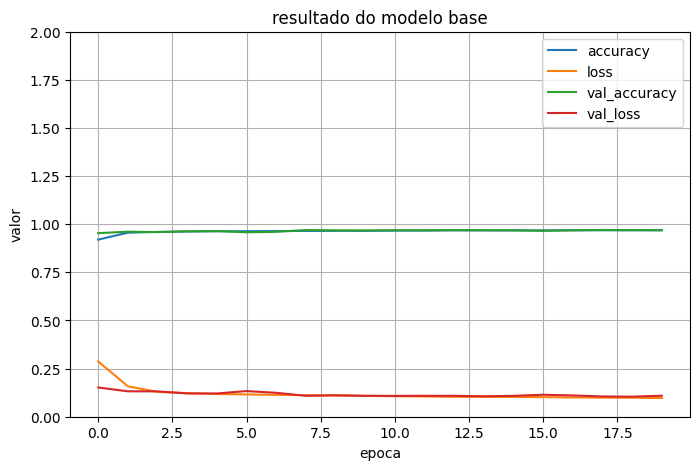

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9688 - loss: 0.1090
acuracia do modelo base no teste: 0.9683

--- [tarefa b] testando largura e profundidade ---

treinando modelo mais largo...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9703 - loss: 0.0992
acuracia do modelo mais largo: 0.9700

treinando modelo mais profundo...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9719 - loss: 0.0997
acuracia do modelo mais profundo: 0.9711

--- [tarefa c] identificando overfitting e underfitting ---

exemplo de overfitting (100 epocas)...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


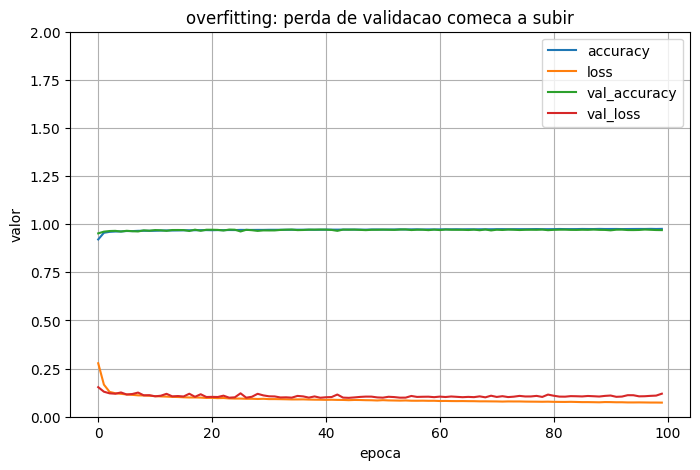

no grafico acima, a perda de validacao (laranja) comeca a subir enquanto a de treino (azul) continua caindo. isso eh overfitting.

exemplo de underfitting (3 epocas)...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


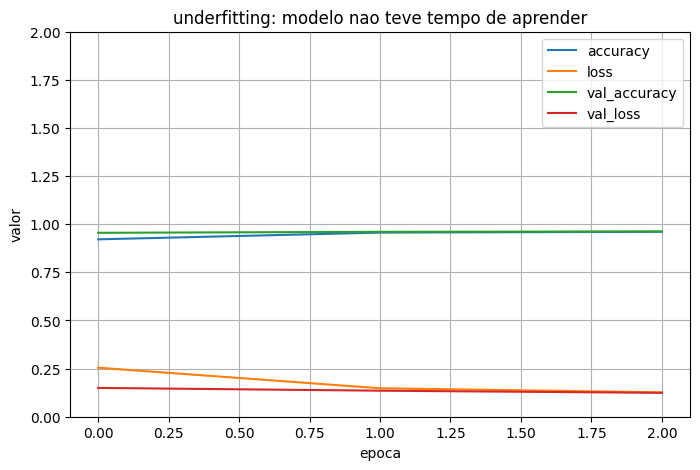

no grafico acima, ambas as perdas ainda estao altas. o modelo nao treinou o suficiente.

--- [tarefa d] usando regularizacao para combater overfitting ---

treinando o modelo com regularizacao...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


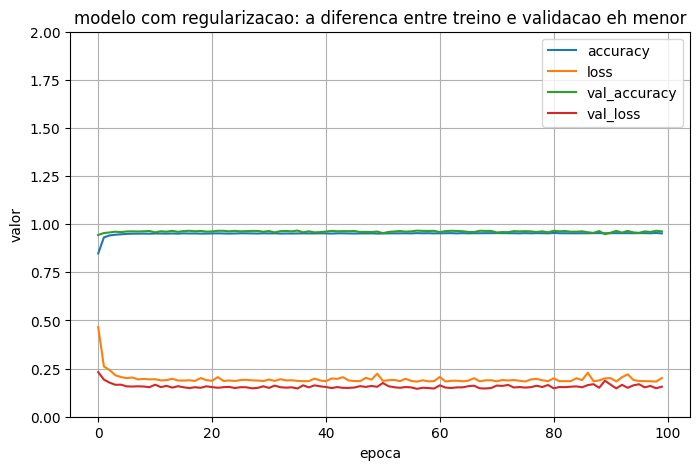

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9641 - loss: 0.1529
acuracia do modelo regularizado no teste: 0.9627
compare o grafico acima com o de overfitting. a regularizacao ajuda a manter a perda de validacao mais baixa e estavel.


In [2]:
!pip install tensorflow pandas scikit-learn matplotlib seaborn

import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from google.colab import drive # import pra usar o google drive


drive.mount('/content/drive')
try:
    df = pd.read_csv('/content/drive/MyDrive/star_classification.csv')
    print("dataset carregado com sucesso do google drive!")
except FileNotFoundError:
    print("erro: arquivo 'star_classification.csv' nao encontrado.")
    print("verifique se o nome do arquivo esta correto e se ele esta na pasta principal ('Meu Drive').")


# GALAXY -> 0, QSO -> 1, STAR -> 2
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])

# separando as features (x) do nosso alvo (y)
X = df.drop(['class', 'obj_ID', 'spec_obj_ID'], axis=1)
y = df['class']

# dividindo os dados em treino e teste
# 80% pra treinar, 20% pra testar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def plot_history(history, title):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.title(title)
    plt.ylabel("valor")
    plt.xlabel("epoca")
    plt.gca().set_ylim(0, 2)
    plt.show()

# --- tarefa a: criar e treinar a rede neural de classificacao ---
print('\n--- [tarefa a] treinando modelo base ---')
model_base = keras.models.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(3, activation='softmax') # 3 neuronios na saida pra 3 classes (GALAXY, QSO, STAR)
])
model_base.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_base = model_base.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), verbose=1)
plot_history(history_base, 'resultado do modelo base')
loss, acc = model_base.evaluate(X_test, y_test)
print(f'acuracia do modelo base no teste: {acc:.4f}')

# --- tarefa b: testar largura e profundidade ---
print('\n--- [tarefa b] testando largura e profundidade ---')
model_largo = keras.models.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=[X_train.shape[1]]),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])
model_largo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("\ntreinando modelo mais largo...")
model_largo.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), verbose=0)
loss_l, acc_l = model_largo.evaluate(X_test, y_test)
print(f'acuracia do modelo mais largo: {acc_l:.4f}')

# modelo mais profundo
model_profundo = keras.models.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'), # camada extra
    keras.layers.Dense(3, activation='softmax')
])
model_profundo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("\ntreinando modelo mais profundo...")
model_profundo.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), verbose=0)
loss_p, acc_p = model_profundo.evaluate(X_test, y_test)
print(f'acuracia do modelo mais profundo: {acc_p:.4f}')

# --- tarefa c: testar epocas e learning rate (overfitting/underfitting) ---
print('\n--- [tarefa c] identificando overfitting e underfitting ---')

# overfitting: treinar por muitas epocas
print('\nexemplo de overfitting (100 epocas)...')
model_overfit = keras.models.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])
model_overfit.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_overfit = model_overfit.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)
plot_history(history_overfit, 'overfitting: perda de validacao comeca a subir')
print("no grafico acima, a perda de validacao (laranja) comeca a subir enquanto a de treino (azul) continua caindo. isso eh overfitting.")

# underfitting: treinar por poucas epocas
print('\nexemplo de underfitting (3 epocas)...')
model_underfit = keras.models.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])
model_underfit.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_underfit = model_underfit.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test), verbose=0)
plot_history(history_underfit, 'underfitting: modelo nao teve tempo de aprender')
print("no grafico acima, ambas as perdas ainda estao altas. o modelo nao treinou o suficiente.")

# --- tarefa d: testar regularizacao e otimizacao ---
print('\n--- [tarefa d] usando regularizacao para combater overfitting ---')

# usando l2 e dropout no modelo que deu overfit
model_regularizado = keras.models.Sequential([
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001), input_shape=[X_train.shape[1]]),
    keras.layers.Dropout(0.5), # dropout "desliga" 50% dos neuronios aleatoriamente a cada passo do treino
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)), # regularizacao l2 penaliza pesos altos
    keras.layers.Dropout(0.5),
    keras.layers.Dense(3, activation='softmax')
])
model_regularizado.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("\ntreinando o modelo com regularizacao...")
history_regularizado = model_regularizado.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)
plot_history(history_regularizado, 'modelo com regularizacao: a diferenca entre treino e validacao eh menor')
loss_r, acc_r = model_regularizado.evaluate(X_test, y_test)
print(f'acuracia do modelo regularizado no teste: {acc_r:.4f}')
print("compare o grafico acima com o de overfitting. a regularizacao ajuda a manter a perda de validacao mais baixa e estavel.")